## Observations and Insights 

* There was an almost even distribution of male and female mice
* The Capomulin and Ramicane drug have the lowest final mean tumor volumes and may be indicative that they perform better than the other drug regimens.
* The Infubinol was the only one that had an outlier out of the four drug regimens that were analyzed more. 
* For the Capomulin drug, it appears the lower the mouse's weight the lower the tumor volume. 
* The weight to tumor volume correlation appears linear. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mousestudy_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
combined_mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
mouse_cnt = combined_mousestudy_df["Mouse ID"].count()
mouse_cnt

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_timepoint_df = combined_mousestudy_df[combined_mousestudy_df.duplicated(["Mouse ID", "Timepoint"])]
mouse_id = duplicate_mice_timepoint_df.iloc[0,0]
mouse_id

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_timepoint_all_df = combined_mousestudy_df[combined_mousestudy_df["Mouse ID"] == mouse_id]
duplicate_mice_timepoint_all_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combined_mousestudy_df[combined_mousestudy_df["Mouse ID"] != mouse_id]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_cnt = clean_mice_df["Mouse ID"].count()
clean_mouse_cnt

1880

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

regimen_groupby = clean_mice_df.groupby(["Drug Regimen"])

mean_volume = regimen_groupby["Tumor Volume (mm3)"].mean()
median_volume = regimen_groupby["Tumor Volume (mm3)"].median()
variance_volume = regimen_groupby["Tumor Volume (mm3)"].var()
st_volume = regimen_groupby["Tumor Volume (mm3)"].std()
sem_volume = regimen_groupby["Tumor Volume (mm3)"].sem()

volume_stats_df = pd.merge(mean_volume,median_volume, on="Drug Regimen")
volume_stats_df = volume_stats_df.rename(columns={
    "Tumor Volume (mm3)_x":"Mean Tumor Volume",
    "Tumor Volume (mm3)_y":"Median Tumor Volume"})
volume_stats_df = pd.merge(volume_stats_df,variance_volume, on="Drug Regimen")
volume_stats_df = volume_stats_df.rename(columns={"Tumor Volume (mm3)":"Variance Tumor Volume"})
volume_stats_df = pd.merge(volume_stats_df,st_volume, on="Drug Regimen")
volume_stats_df = volume_stats_df.rename(columns={"Tumor Volume (mm3)":"Standard Deviation Tumor Volume"})   
volume_stats_df = pd.merge(volume_stats_df,sem_volume, on="Drug Regimen")
volume_stats_df = volume_stats_df.rename(columns={"Tumor Volume (mm3)":"SEM Tumor Volume"})    
      
volume_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

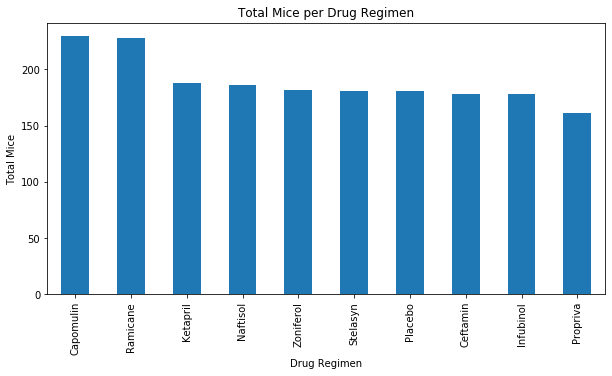

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pandas.

total_mice = combined_mousestudy_df["Drug Regimen"].value_counts()

mice_plot_bar = total_mice.plot(kind="bar", figsize=(10,5),title="Total Mice per Drug Regimen")
mice_plot_bar.set_xlabel("Drug Regimen")
mice_plot_bar.set_ylabel("Total Mice")

plt.show()
plt.tight_layout()

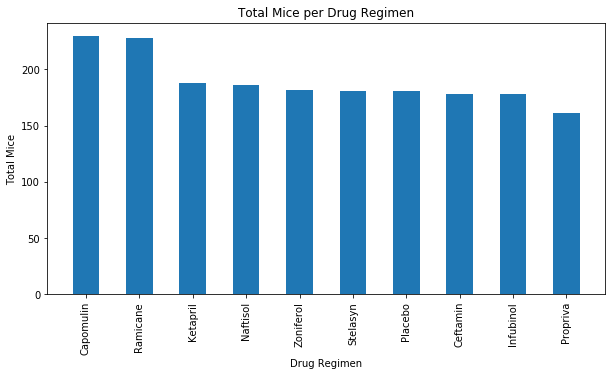

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment 
# throughout the course of the study using pyplot.

total_mice = combined_mousestudy_df["Drug Regimen"].value_counts()
drug_regimen = total_mice.keys()

plt.figure(figsize=(10,5))
plt.bar(drug_regimen,total_mice,width=0.5)
plt.xticks(rotation="vertical")
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice")

plt.show()

## Pie Plots

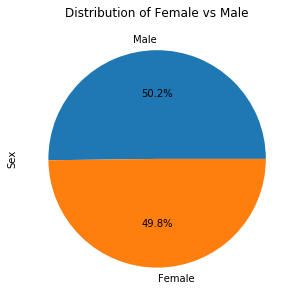

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_mice = mouse_metadata["Sex"].value_counts()

mice_plot_pie = total_mice.plot(kind="pie",figsize=(5,5),title = "Distribution of Female vs Male",autopct='%1.1f%%')

plt.show()
plt.tight_layout()

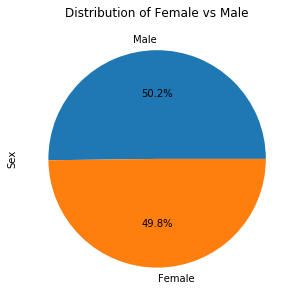

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

total_gemder = mouse_metadata["Sex"].value_counts()
gender = total_gemder.keys()

plt.figure(figsize=(5,5))
plt.pie(total_gemder,labels=gender,autopct="%1.1f%%")
plt.title("Distribution of Female vs Male")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Finding the max timepoint per mouse to determine the final tumor volume
mouse_groupby = combined_mousestudy_df.groupby(["Mouse ID"])
max_timepoint = mouse_groupby["Timepoint"].max()
mouse_timepoint_df = pd.merge(combined_mousestudy_df,max_timepoint, on=["Mouse ID","Timepoint"])

capomulin_treatment_df = mouse_timepoint_df.loc[(mouse_timepoint_df["Drug Regimen"] == "Capomulin")]
ramicane_treatment_df = mouse_timepoint_df.loc[(mouse_timepoint_df["Drug Regimen"] == "Ramicane")]
infubinol_treatment_df = mouse_timepoint_df.loc[(mouse_timepoint_df["Drug Regimen"] == "Infubinol")]
ceftamin_treatment_df = mouse_timepoint_df.loc[(mouse_timepoint_df["Drug Regimen"] == "Ceftamin")]

quartiles_capomulin = capomulin_treatment_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
quartiles_ramicane = ramicane_treatment_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
quartiles_infubinol = infubinol_treatment_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
quartiles_ceftamin = ceftamin_treatment_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])

lowerq_capomulin = quartiles_capomulin[0.25]
lowerq_ramicane = quartiles_ramicane[0.25]
lowerq_infubinol = quartiles_infubinol[0.25]
lowerq_ceftamin = quartiles_ceftamin[0.25]

upperq_capomulin = quartiles_capomulin[0.75]
upperq_ramicane = quartiles_ramicane[0.75]
upperq_infubinol = quartiles_infubinol[0.75]
upperq_ceftamin = quartiles_ceftamin[0.75]

iqr_capomulin = upperq_capomulin - lowerq_capomulin
iqr_ramicane = upperq_ramicane - lowerq_ramicane
iqr_infubinol = upperq_infubinol - lowerq_infubinol
iqr_ceftamin = upperq_ceftamin - lowerq_ceftamin

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

outlier_capomulin = capomulin_treatment_df.loc[(capomulin_treatment_df["Tumor Volume (mm3)"] < lower_bound_capomulin) |
                                               (capomulin_treatment_df["Tumor Volume (mm3)"] > upper_bound_capomulin)]
outlier_ramicane = ramicane_treatment_df.loc[(ramicane_treatment_df["Tumor Volume (mm3)"] < lower_bound_ramicane) |
                                             (ramicane_treatment_df["Tumor Volume (mm3)"] > upper_bound_ramicane)]
outlier_infubinol = infubinol_treatment_df.loc[(infubinol_treatment_df["Tumor Volume (mm3)"] < lower_bound_infubinol) |
                                               (infubinol_treatment_df["Tumor Volume (mm3)"] > upper_bound_infubinol)]
outlier_ceftamin = ceftamin_treatment_df.loc[(ceftamin_treatment_df["Tumor Volume (mm3)"] < lower_bound_ceftamin) |
                                             (ceftamin_treatment_df["Tumor Volume (mm3)"] > upper_bound_ceftamin)]

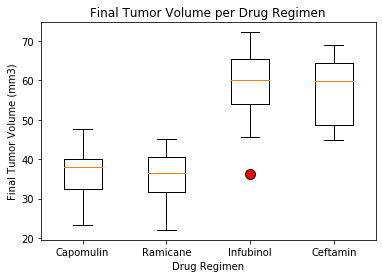

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
combine = [capomulin_treatment_df["Tumor Volume (mm3)"],
           ramicane_treatment_df["Tumor Volume (mm3)"],
           infubinol_treatment_df["Tumor Volume (mm3)"],
           ceftamin_treatment_df["Tumor Volume (mm3)"]]

drugs = ["Capomulin","Ramicane","Infubinol",'Ceftamin']
tick_locations = [1,2,3,4]

fig5,ax5 = plt.subplots()
ax5.set_ylabel("Final Tumor Volume (mm3)")
ax5.set_xlabel("Drug Regimen")
ax5.set_title("Final Tumor Volume per Drug Regimen")
outlier = dict(marker="o", markerfacecolor="red", markersize=10)
ax5.boxplot(combine,flierprops=outlier)
plt.xticks(tick_locations,drugs)

plt.show()

## Line and Scatter Plots

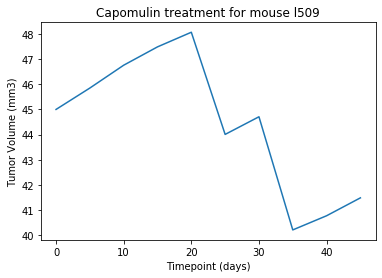

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
selected_mouse = "l509"

capomulin_mouse_df = combined_mousestudy_df.loc[(combined_mousestudy_df["Drug Regimen"] == "Capomulin") &
                                          (combined_mousestudy_df["Mouse ID"] == selected_mouse)]

plt.plot(capomulin_mouse_df["Timepoint"],capomulin_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment for mouse " + selected_mouse)
plt.show()

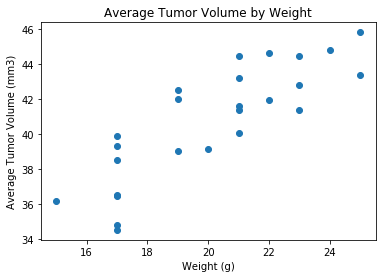

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combined_mousestudy_df.loc[(combined_mousestudy_df["Drug Regimen"] == "Capomulin")]
capomulin_groupby_df = capomulin_df.groupby(["Mouse ID"])
average_volume = capomulin_groupby_df["Tumor Volume (mm3)"].mean()
mouse_weight = mouse_metadata[["Mouse ID", "Weight (g)"]]

combined_weight_volume = pd.merge(mouse_weight,average_volume, on=["Mouse ID"])

plt.scatter(combined_weight_volume["Weight (g)"],combined_weight_volume["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()


## Correlation and Regression

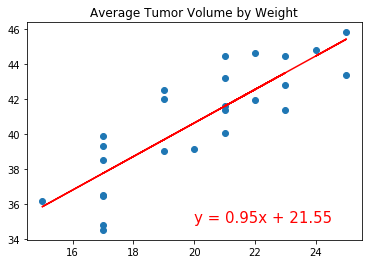

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = combined_weight_volume["Weight (g)"]
y_values = combined_weight_volume["Tumor Volume (mm3)"]

correlation_coeff = st.pearsonr(x_values,y_values)[0]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_avlue = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_avlue,"r-")
plt.xlabel = "Weight (g)"
plt.ylabel = "Average Tumor Volume (mm3)"
plt.title("Average Tumor Volume by Weight")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

plt.show()